In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Prepare the dataset for OR gate
X_or = np.array([[0, 0],
[0, 1],
[1, 0],
[1, 1]])
y_or = np.array([[0], [1], [1], [1]])  # OR gate outputs

In [ ]:
# Prepare the dataset for NOR gate
X_nor = np.array([[0, 0],
[0, 1],
[1, 0],
[1, 1]])
y_nor = np.array([[1], [0], [0], [0]])  # NOR gate outputs

In [ ]:
# Function to create and train the model
def create_and_train_model(X, y):
    # Create the model
    model = Sequential()
    model.add(Dense(2, input_dim=2, activation='sigmoid'))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))               # Output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X, y, epochs=5000, verbose=0)
    return model

In [ ]:
# Train the OR gate model
or_model = create_and_train_model(X_or, y_or)
print("OR Gate Predictions:")
print(or_model.predict(X_or))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


OR Gate Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.12427392]
 [0.9764601 ]
 [0.9723245 ]
 [0.9932212 ]]


In [ ]:
# Train the NOR gate model
nor_model = create_and_train_model(X_nor, y_nor)
print("\nNOR Gate Predictions:")
print(nor_model.predict(X_nor))


NOR Gate Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.9459195 ]
 [0.02188767]
 [0.02583857]
 [0.00851758]]


In [ ]:
# Visualize predictions
def plot_predictions(model, X, title):
      predictions = model.predict(X)
      plt.figure()
      plt.scatter(X[:, 0], X[:, 1], c=predictions.flatten(), cmap='coolwarm', s=100)
      plt.title(title)
      plt.xlabel('Input 1')
      plt.ylabel('Input 2')
      plt.colorbar(label='Output')
      plt.xlim(-0.5, 1.5)
      plt.ylim(-0.5, 1.5)
      plt.axhline(0.5, color='grey', lw=0.5, ls='--')
      plt.axvline(0.5, color='grey', lw=0.5, ls='--')
      plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


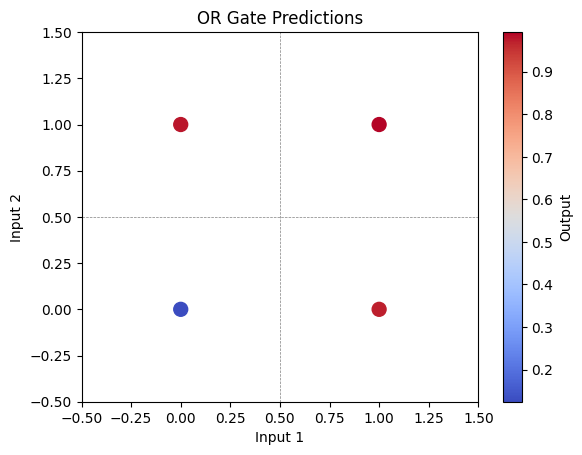

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


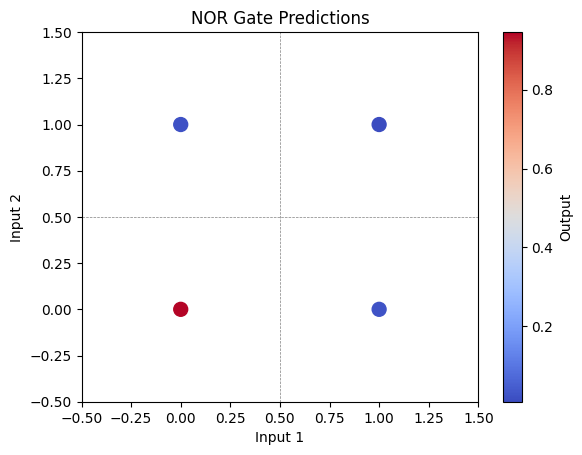

In [ ]:
# Plotting the predictions for both gates
plot_predictions(or_model, X_or, "OR Gate Predictions")
plot_predictions(nor_model, X_nor, "NOR Gate Predictions")